#### Investigate worldwide research on Autism and analyze how the estimates of the publications compare to the data from the self-reporting test data

In [118]:
# import relevant libraries and modules
import pandas as pd
import sqlite3
from arff import load
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import seaborn as sns

In [6]:
# Load adult ARFF file
arff_adult = load(open('Autism-Adult-Data.arff'))

In [10]:
# Extract data and attributes
data = arff_adult['data']
attributes = [attr[0] for attr in arff_adult['attributes']]

# Create DataFrame  using data and attributes
adult_df = pd.DataFrame(data, columns=attributes)

In [12]:
# Convert DataFrame into a csv file
adult_df.to_csv('autism_adult_data.csv', index=False)

In [13]:
# Load child ARFF file
arff_child = load(open('Autism-Child-Data.arff'))

In [14]:
# Extract data and attributes
data = arff_child['data']
attributes = [attr[0] for attr in arff_child['attributes']]

# Create DataFrame  using data and attributes
child_df = pd.DataFrame(data, columns=attributes)

In [15]:
# Convert DataFrame into a csv file
child_df.to_csv('autism_child_data.csv', index=False)

In [4]:
# connect to autism database
conn = sqlite3.connect('atsm.db')

In [8]:
# query for view of relevant columns from autism study table
query = "SELECT * FROM rel_study"

df_study = pd.read_sql_query(query, conn)

# make first row into header
df_study.columns = df_study.iloc[0]
df_study = df_study[1:]

In [9]:
df_study

,Author,Title,Year Published,Country,Area(s),Age Range,Study Years,Sample Size,Number of Cases,"ASD Prevalence Estimate per 1,000",Confidence Interval (CI),Male:Female Sex Ratio,IQ Score <70 (%),Percentage of Individual Co-occurring Conditions,Autism Types Included
1,Lotter,Epidemiology of Autistic Conditions in Young C...,1966,England,County of Middlesex,8 to 10,1964,78000.0,35.0,0.45,0.32 - 0.62,2.6,84.0,,autistic conditions
2,Treffert,Epidemiology of infantile Autism,1970,USA,Wisconsin,2 to 12,1962-1967,899750.0,69.0,0.077,0.06 - 0.10,3.1,,,classic infantile autism
3,Brask,A Prevalence investigation of Childhood Psychoses,1972,Denmark,Åarhus County,2 to 14,1962,46500.0,20.0,0.43,0.28 - 0.66,1.7,,,autistic syndrome
4,"Wing, et al.",The prevalence of early childhood autism: comp...,1976,England,Camberwall,5 to 14,1974,25000.0,12.0,4.48,0.27 - 0.84,,,,early childhood autism
5,"Wing, et al.",Severe impairments of social interaction and a...,1979,England,Camberwell,0 to 14,1970,35000.0,17.0,0.49,0.30 - 0.78,,70.0,0 (Down syndrome),autism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,"Maenner, et al.",Prevalence and Characteristics of Autism Spect...,2021,USA,Arizona; Arkansas; California; Georgia; Maryla...,8,2018,220281.0,5058.0,23.0,22.30 - 23.60,4.2,35.2,,ASD (not specified)
204,"Roman-Urrestarazu, et al.",Association of Race/Ethnicity and Social Disad...,2021,England,National,5 to 19,2017,7047238.0,119821.0,17.6,16.90 - 17.10,4.3,,,ASD (not specified)
205,"Shenouda, et al.",Prevalence of autism spectrum disorder in a la...,2022,USA,New Jersey,8,2016,26083.0,942.0,36.0,34.00 - 38.00,4.3,25.2,,ASD (not specified)
206,"Villegas-Lirola, et al.",Prevalence of Autism Spectrum Disorder in Chil...,2022,Spain,Andalusia,6 to 12,2020-2021,,4678.0,8.65,8.40 - 8.90,5.4,,,"Autism, Asperger Syndrome, Pervasive Developme..."


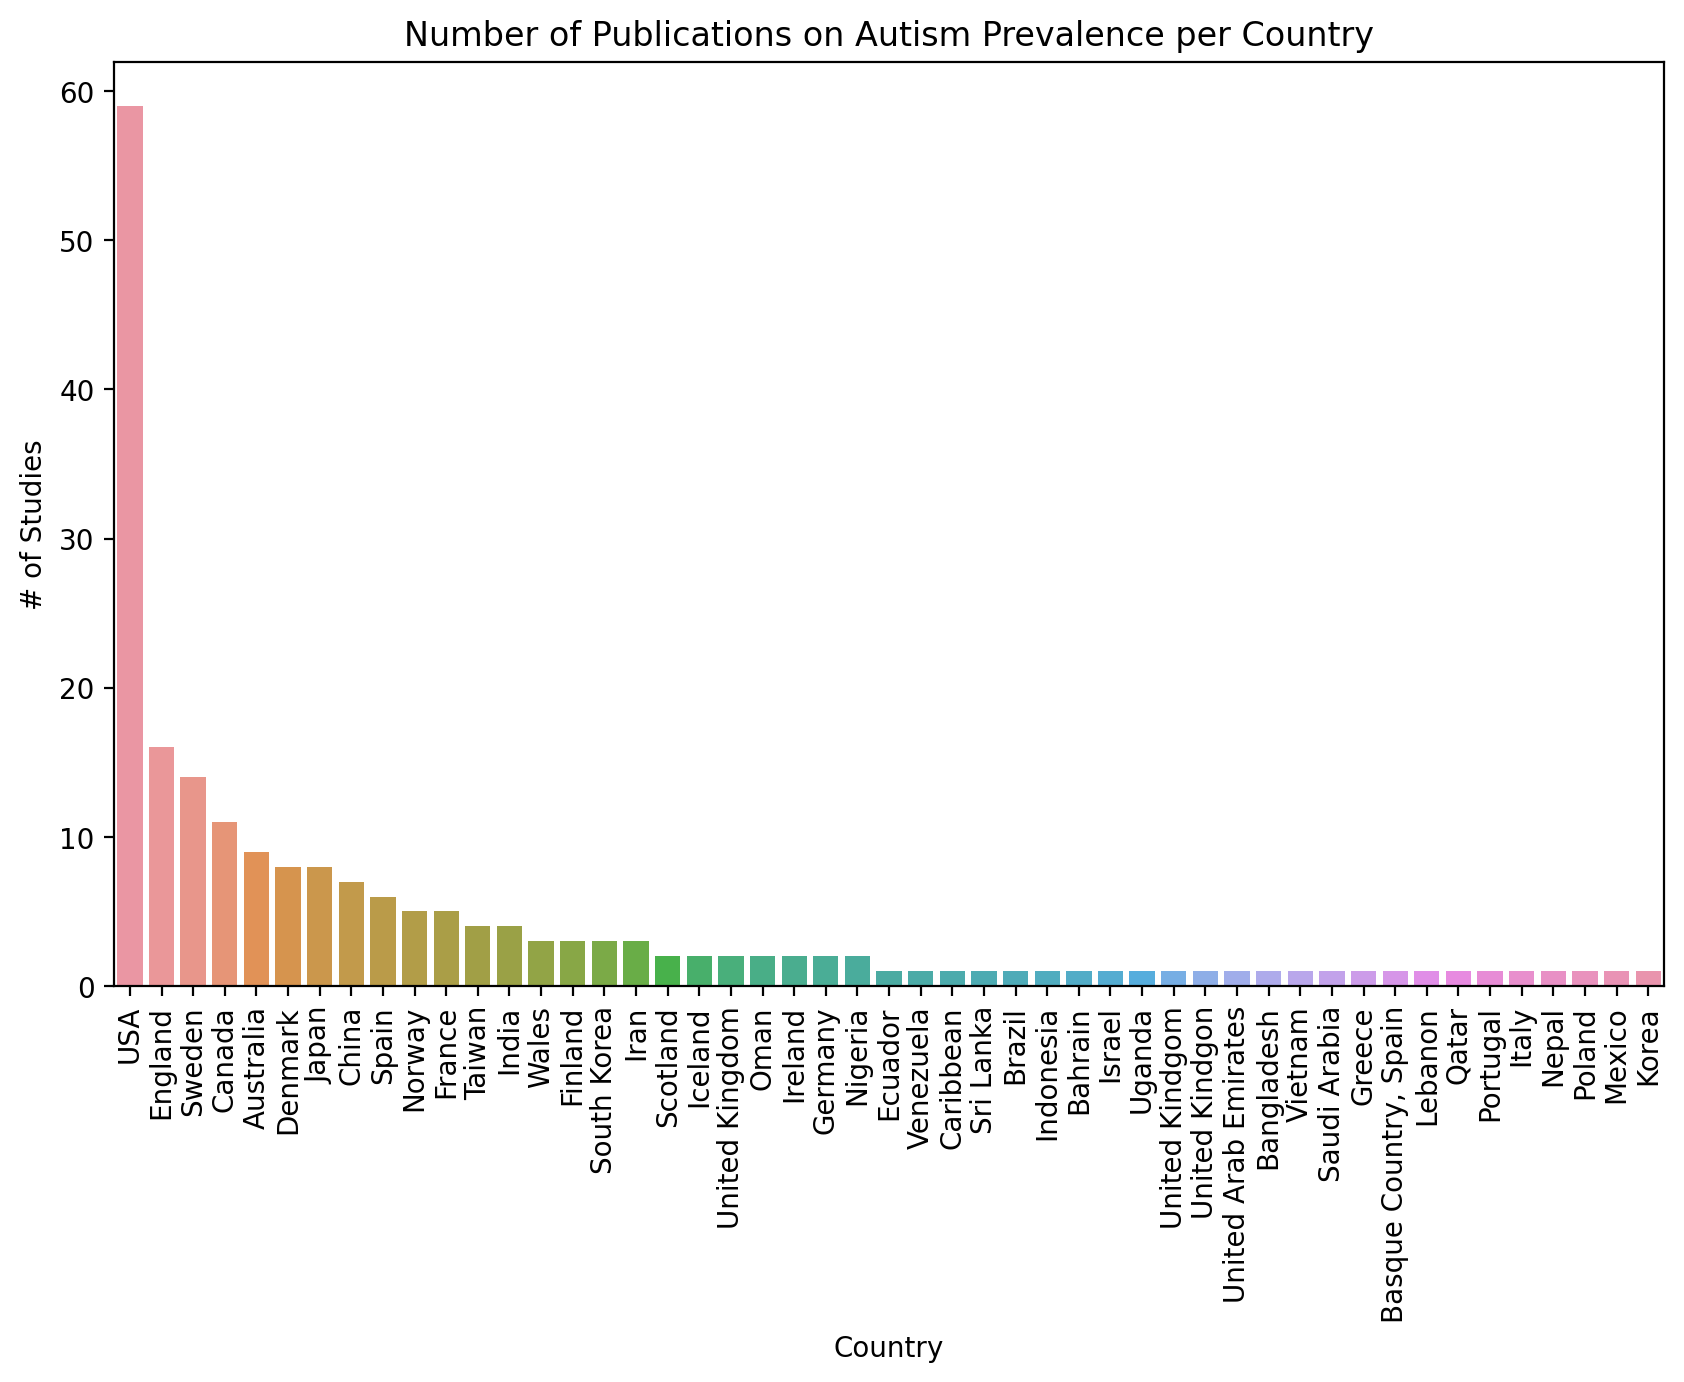

In [188]:
# plot the distribution of studies based on country

# sort countries into descending order of frequency
country_counts = df_study['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
sorted_df = country_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=sorted_df, x='Country', y='Count')
plt.xticks(rotation=90)
plt.title('Number of Publications on Autism Prevalence per Country')
plt.ylabel('# of Studies')
plt.savefig('publications_per_country.png')
plt.show()



<Figure size 2250x3000 with 0 Axes>

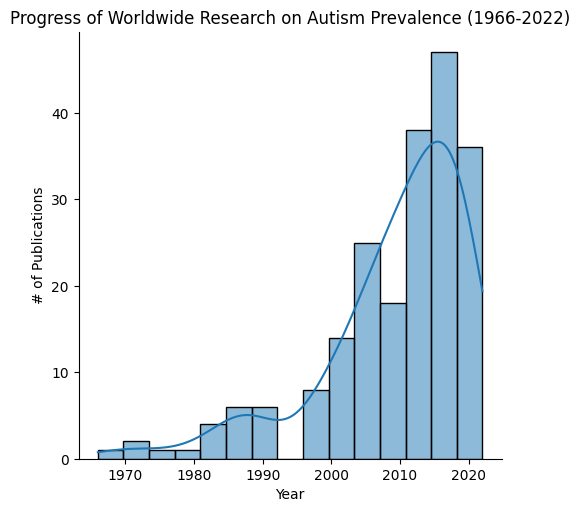

In [195]:
# plot the growth of autism prevalence research since 1966
plt.figure(figsize=(15,20), dpi=150)
sns.displot(df_study['Year Published'], kde=True)
plt.title('Progress of Worldwide Research on Autism Prevalence (1966-2022)')
plt.xlabel('Year')
plt.ylabel('# of Publications')
plt.savefig('autism_research_progress.png')
plt.show()

In [74]:
# convert table of adult and child asd counts to dataframes
query = "SELECT * FROM adult_asd_counts"
adult_asd_counts = pd.read_sql_query(query, conn)

query = "SELECT * FROM child_asd_counts"
child_asd_counts = pd.read_sql_query(query, conn)

In [58]:
# load country boundaries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Ankit\AppData\Local\Temp\ipykernel_18752\2006238364.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [73]:
# convert world boundaries data into a csv file
world.to_csv('world_map_data.csv', index=False)

In [72]:
# check which countries are in the publications dataset
# but not in the world boundaries library
countries = []
not_countries = []
for country in sorted_df['Country']:
    if country in list(world['name']):
        countries.append(country)
    else:
        not_countries.append(country)

print(len(countries))
print(not_countries)


39
['USA', 'England', 'Wales', 'Scotland', 'Caribbean', 'Bahrain', 'United Kindgom', 'United Kindgon', 'Basque Country, Spain', 'Korea']


In [108]:
# convert table of estimates per country into dataframe 
query = "SELECT * FROM est_per_country"
country_estimates = pd.read_sql_query(query, conn)

In [110]:
# clean table of estimates

# united kingdom
country_estimates.at[44, 'avg_asd_per_1000_est'] = 5.94
country_estimates = country_estimates[~country_estimates['country'].isin(['England', 'Wales', 'Scotland', 'United Kindgom', 'United Kindgon'])]

# korea
country_estimates.at[34, 'avg_asd_per_1000_est'] = 11.65
country_estimates = country_estimates[~country_estimates['country'].isin(['Korea'])]

# spain
country_estimates.at[35, 'avg_asd_per_1000_est'] = 9.28
country_estimates = country_estimates[~country_estimates['country'].isin(['Basque Country, Spain'])]

# usa
country_estimates.at[39, 'country'] = 'United States of America'

# caribbean
caribbean = [{'country': 'Bahamas', 'avg_asd_per_1000_est': 5.30}, 
             {'country': 'Cuba', 'avg_asd_per_1000_est': 5.30},
             {'country': 'Dominican Rep.', 'avg_asd_per_1000_est': 5.30},
             {'country': 'Haiti', 'avg_asd_per_1000_est': 5.30},
             {'country': 'Jamaica', 'avg_asd_per_1000_est': 5.30}]

for country in caribbean: 
    country_estimates = country_estimates.append(country, ignore_index=True)
country_estimates = country_estimates[~country_estimates['country'].isin(['Caribbean'])]

# bahrain
country_estimates = country_estimates[~country_estimates['country'].isin(['Bahrain'])]

country_estimates

C:\Users\Ankit\AppData\Local\Temp\ipykernel_18752\1982315519.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_estimates = country_estimates.append(country, ignore_index=True)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_18752\1982315519.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_estimates = country_estimates.append(country, ignore_index=True)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_18752\1982315519.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_estimates = country_estimates.append(country, ignore_index=True)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_18752\1982315519.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

,country,avg_asd_per_1000_est
0,Australia,14.92
2,Brazil,2.72
3,Canada,8.55
5,China,5.13
6,Denmark,6.74
7,Ecuador,1.10
8,Finland,5.76
9,France,1.75
10,Germany,2.00
11,Greece,11.50


In [101]:
sorted(list(world.name))

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [112]:
# check if countries have been properly cleaned
# to match those in world boundaries library
print([country for country in list(country_estimates.country) if country not in (list(world.name))])

[]


In [120]:
# merged world boundaries with publications' country estimates data
merged = world.merge(country_estimates, left_on='name', right_on='country', how='left')
merged['avg_asd_per_1000_est'].fillna(0, inplace=True)

In [124]:
# remove antarctica from map
merged = merged[~merged['name'].isin(['Antarctica'])]

In [125]:
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,avg_asd_per_1000_est
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,0.00
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,0.00
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,0.00
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,8.55
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,12.14
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,0.00
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,0.00
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,0.00
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,0.00


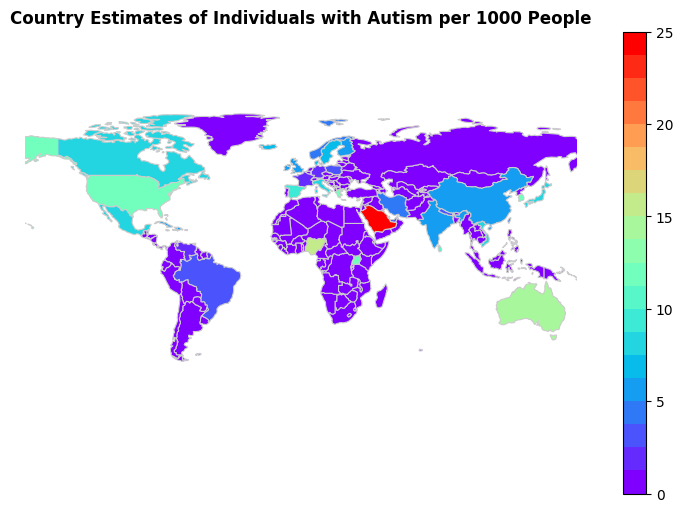

In [147]:
# Plot the worldmap of estimates for individuals with autism

# create figure and axis for plot
fig, ax = plt.subplots(figsize=(12, 6))

# get max and min estimate values
max_value = merged['avg_asd_per_1000_est'].max()
min_value = merged['avg_asd_per_1000_est'].min()

# create colormap with distinct colors
cmap = plt.cm.get_cmap('rainbow', 20)

# create a normalized colormap based on range of estimate values
norm = colors.Normalize(vmin=min_value, vmax=max_value)

# plot worldmap using custom colormap
merged.plot(column='avg_asd_per_1000_est', cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Country Estimates of Individuals with Autism per 1000 People', fontdict={'fontsize': '12', 'fontweight': 'bold'})
ax.set_axis_off()

# adjust the extent of the map to make it bigger
ax.set_xlim([-160, 160])  # Adjust the x-axis limits
ax.set_ylim([-130, 130])  # Adjust the y-axis limits

plt.savefig('Estimates_WorldMap.png')
plt.show()

In [152]:
# convert view of actual autism counts per country into dataframe
query = "SELECT * FROM country_asd_counts"
country_asd_counts = pd.read_sql_query(query, conn)

In [169]:
# clean dataframe of country autism estimates
# to match those in world boundary libraries

# USA
country_asd_counts.at[48, 'country_of_res'] = 'United States of America'
country_asd_counts.at[48, 'asd_count'] = 85
country_asd_counts.at[48, 'total_count'] = 157
country_asd_counts = country_asd_counts[~country_asd_counts['country_of_res'].isin(['AmericanSamoa'])]

# Vietnam
country_asd_counts.at[50, 'country_of_res'] = 'Vietnam'

# Europe
country_asd_counts.at[18, 'asd_count'] = 2
country_asd_counts.at[18, 'total_count'] = 2
country_asd_counts = country_asd_counts[~country_asd_counts['country_of_res'].isin(['Europe'])]

# United Kingdom
country_asd_counts.at[47, 'asd_count'] = 54
country_asd_counts.at[47, 'total_count'] = 127
country_asd_counts = country_asd_counts[~country_asd_counts['country_of_res'].isin(['Isle of Man'])]

# Europe
country_asd_counts.at[25, 'asd_count'] = 5
country_asd_counts.at[25, 'total_count'] = 6
country_asd_counts = country_asd_counts[~country_asd_counts['country_of_res'].isin(['Malta'])]

# Bahrain
country_asd_counts.at[7, 'country_of_res'] = 'Qatar'

In [176]:
# scale estimates so the plotted map is comparable
# to the map from publications data
country_asd_counts['asd_proportion'] = round(country_asd_counts['asd_count']/country_asd_counts['total_count'], 2)
country_asd_counts['est_per_1000'] = (country_asd_counts['asd_proportion']*1000) / 40

country_asd_counts

,country_of_res,asd_count,total_count,asd_proportion,est_per_1000
0,Afghanistan,2,13,0.15,3.75
2,Argentina,1,2,0.50,12.50
3,Armenia,3,3,1.00,25.00
4,Australia,24,50,0.48,12.00
5,Austria,4,6,0.67,16.75
6,Bahamas,1,2,0.50,12.50
7,Qatar,2,2,1.00,25.00
8,Bangladesh,3,9,0.33,8.25
9,Belgium,1,3,0.33,8.25
10,Bhutan,1,1,1.00,25.00


In [171]:
# check that all countries in dataframe match those in world library
print([country for country in list(country_asd_counts.country_of_res) if country not in (list(world.name))])

[]


In [178]:
# merge world boundaries data with the estimated autism prevalence per country data
merged2 = world.merge(country_asd_counts, left_on='name', right_on='country_of_res', how='left')
merged2['est_per_1000'].fillna(0, inplace=True)

In [179]:
merged2 = merged2[~merged2['name'].isin(['Antarctica'])]

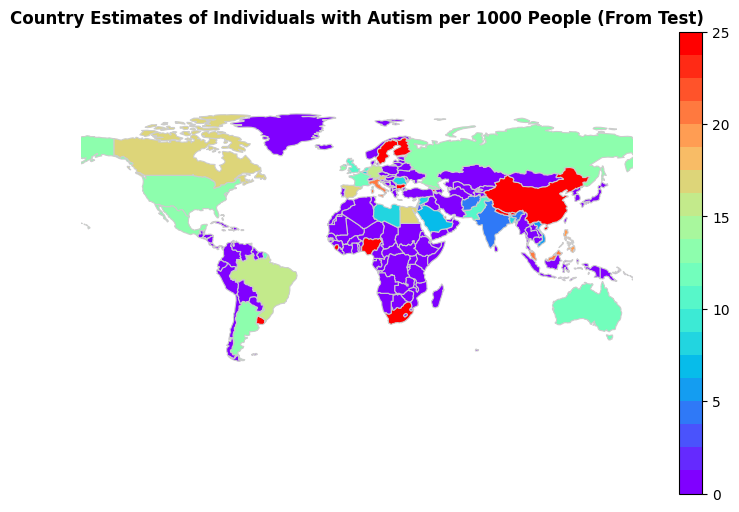

In [182]:
# Plot the worldmap of estimates for individuals with autism

# create figure and axis for plot
fig, ax = plt.subplots(figsize=(12, 6))

# get max and min estimate values
max_value = merged2['est_per_1000'].max()
min_value = merged2['est_per_1000'].min()

# create colormap with distinct colors
cmap = plt.cm.get_cmap('rainbow', 20)

# create a normalized colormap based on range of estimate values
norm = colors.Normalize(vmin=min_value, vmax=max_value)

# plot worldmap using custom colormap
merged2.plot(column='est_per_1000', cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Country Estimates of Individuals with Autism per 1000 People (From Test)', fontdict={'fontsize': '12', 'fontweight': 'bold'})
ax.set_axis_off()

# adjust the extent of the map to make it bigger
ax.set_xlim([-160, 160])  # Adjust the x-axis limits
ax.set_ylim([-130, 130])  # Adjust the y-axis limits

plt.savefig('Estimates_WorldMap_Test.png')
plt.show()